In [1]:
# Imporing Libraries - Numpy, Pandas, Matplotlib.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(rc={'figure.figsize': [10, 6]}, font_scale=1.3)

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')

In [3]:
data.head() # Structural Veiw of Dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.info() # Statistical Information about Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
data.corr() # Correlational Data between columns.

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [6]:
data.isnull().sum() # Getting all the NULL values

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchased', ylabel='count'>

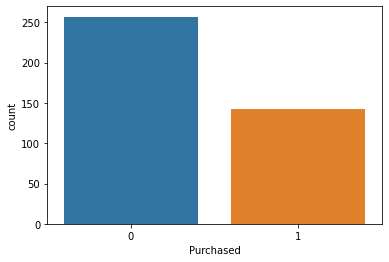

In [7]:
sns.countplot(data['Purchased'])

<AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>

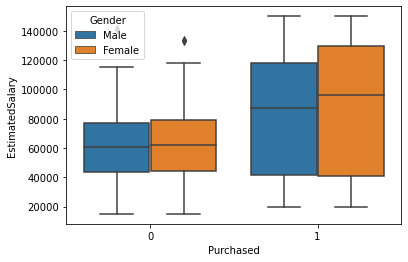

In [8]:
sns.boxplot(data=data,x='Purchased',y='EstimatedSalary',hue='Gender')

<AxesSubplot:xlabel='Purchased', ylabel='Age'>

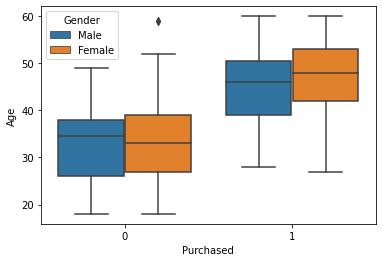

In [9]:
sns.boxplot(data=data,x='Purchased',y='Age',hue='Gender')

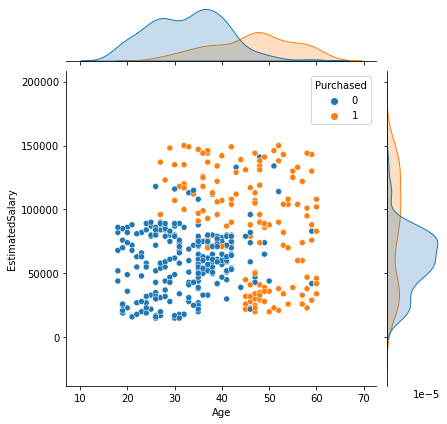

In [10]:
sns.jointplot(x='Age',y='EstimatedSalary',data=data, hue = 'Purchased', kind= 'scatter');

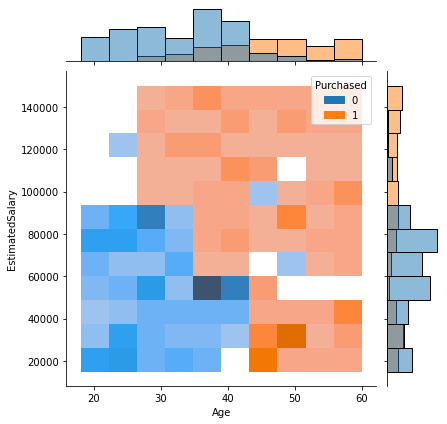

In [11]:
sns.jointplot(x='Age',y='EstimatedSalary',data=data, hue = 'Purchased', kind= 'hist');

In [12]:
# We dont need the first column
# We store the values of column 2 and 3 in X and the value of column 4 in Y.

X = data.iloc[:, [2, 3]].values  
Y = data.iloc[:, 4].values

## Splitting of the Dataset

In [13]:
# Now we will split the dataset into training and test data
# I have taken 60% of data as tranining and 40% as test data

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 0)

## Feature Scaling 

In [14]:
# I have used StandardScaler model to predict the outcome.

from sklearn.preprocessing import StandardScaler
StdSclr = StandardScaler()

X_train = StdSclr.fit_transform(X_train)
X_test = StdSclr.transform(X_test)

In [15]:
# print(X_test)
# print(X_train)

In [16]:
# After the normalization and feature scaling of data, now we will fit our data to SVM classifier module

## Fitting Data to SVM classifier

In [19]:
from sklearn.svm import SVC

SVMclassifier = SVC(kernel = 'rbf', random_state = 0) # We can change the kernal NAME to "rbf" for a NON-LINEAR kernal
SVMclassifier.fit(X_train, Y_train)

SVC(random_state=0)

## Prediction Time!

In [20]:
Y_pred = SVMclassifier.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, confusion_matrix,ConfusionMatrixDisplay

confusionMatrix = confusion_matrix(Y_test, Y_pred)
print(confusionMatrix)

[[92  9]
 [ 6 53]]


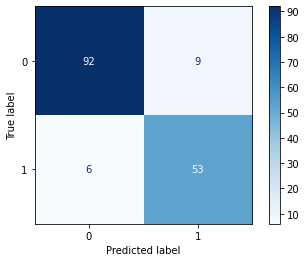

In [22]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix,display_labels=SVMclassifier.classes_)
conf_matrix.plot(cmap=plt.cm.Blues)
plt.show()

# The below confusion matrix predicts that out of 150 predictions, 15 are predicted incorrect !!

In [23]:
print("The accuracy percentange of the above model using this kernal : " ,accuracy_score(Y_test,Y_pred) * 100 , "%")

The accuracy percentange of the above model using this kernal :  90.625 %


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


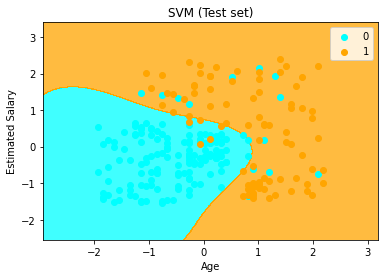

In [30]:
# Heat maps for the Testing data set

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, SVMclassifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('cyan', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('cyan', 'orange'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


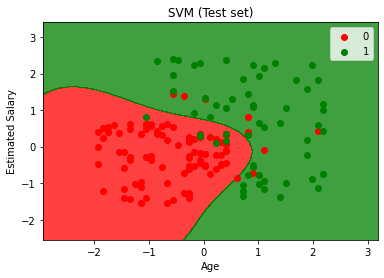

In [31]:
# Heat maps for the Testing data set

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, SVMclassifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [32]:
print("The above was an implementation of SVM classifier Model")

The above was an implementation of SVM classifier Model
